# Tensorflow 簡易教學與實作

## 1. 介紹

Tensorflow 是由 Google 所發布的深度學習框架，讓使用者可以自行設計神經網路的架構，其優點在於在設計神經網路上非常靈活，使用者對於自己的神經路的運作可以有較全面的掌控，而缺點則是入門門檻相較於其他深度學習框架相對較高

## 2. 三種 tensor

tensor 在數學上的意思是任意維度的矩陣，對於深度學習有初步的認識後就不難想像**神經網路就是由許多的 Tensor 所組成**，而 Tensorflow 提供了三種不同特性的 tensor 供使用者建構自己的神經網路

在介紹之前，先定義兩個名詞：

- tensor：任意維度的矩陣
- shape：tensor 在每一維度上的大小

### 2.1 tf.constant()

第一個 tensor 是 tf.constant() 所產生的 tensor，其他的特性為**一旦產生了以後便不能修改它的值**，用法可以參考以下程式碼：

In [1]:
import tensorflow as tf

# 使用 tf.constant() 產生 Tensor
a = tf.constant(0)

print(a)

Tensor("Const:0", shape=(), dtype=int32)


上面的程式碼產生了一個 tensor 被命名為 a 且其值為 0


接著如果想要產生內含矩陣的 tensor 可以這麼做：

In [2]:
# 產生內容為 1 維矩陣的 Tensor
b = tf.constant([1, 2, 3])
print(b)

# 產生內容為 2 維矩陣的 Tensor
c = tf.constant([[2, 4], [6, 8], [10, 12]])
print(c)

Tensor("Const_1:0", shape=(3,), dtype=int32)
Tensor("Const_2:0", shape=(3, 2), dtype=int32)


上面的程式碼產生了一個 1 維 tensor 一個 2 維 tensor，其中各自內容為：

$
b = 
\begin{bmatrix}
    1 & 2 & 3
\end{bmatrix}
$

$
c = 
\begin{bmatrix}
    2 & 4 \\
    6 & 8 \\
    10 & 12
\end{bmatrix}
$

### 2.2 tf.Variable()

tf.Variable() 的用法跟 tf.constant() 類似，它們之間的差在於 **tf.Variable() 產生出來的 tensor 其值可以被修改**，基本用法如下，與 tf.constant() 一樣

In [3]:
a = tf.Variable(0)
b = tf.Variable([1, 2, 3])
c = tf.Variable([[2, 4], [6, 8], [10, 12]])

print(a)
print(b)
print(c)

<tf.Variable 'Variable:0' shape=() dtype=int32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=int32_ref>
<tf.Variable 'Variable_2:0' shape=(3, 2) dtype=int32_ref>


還有一些比較進階的用法，也是比較常用的用法，也就是將 tensor 裡面的值隨機指定：

In [4]:
d = tf.Variable(tf.random_uniform(shape = (3, 2)))

print(d)

<tf.Variable 'Variable_3:0' shape=(3, 2) dtype=float32_ref>


### 2.3 tf.placeholder()

這個 tensor 比較特殊，它的用法是**先產生 tensor 但是不給值，之後再給**，用法如下：

In [5]:
a = tf.placeholder(tf.float32, shape = (3, 2))

print(a)

Tensor("Placeholder:0", shape=(3, 2), dtype=float32)


如此產生了一個 shape 為 (3, 2) 但是還沒有任何數字的 tensor，甚至可以產生連 shape 的某幾維都不明確的 tensor：

In [6]:
b = tf.placeholder(tf.float32, shape = (None, 2))

print(b)

Tensor("Placeholder_1:0", shape=(?, 2), dtype=float32)


這代表這個 tensor 之後可以放入 shape 為 (n, 2) 的矩陣，這裡 n 可以是大於 0 的任意正整數，至於如何給值會在下一個小節探討

## 3. 獲取 tensor 的值

前一節介紹了三種 tensor，可以注意到 tensor 的值沒辦法透過 print() 來查看，那是因為 Tensorflow 有提供自己的一套方法來讓使用者獲取 tensor 的值

### 3.1 tf.Session()

在 Tensorflow 中必須使用 tf.Session() 來獲得 tensor 的內容，具體用法如下：

In [7]:
a = tf.constant(0)
b = tf.constant([1, 2, 3])
c = tf.constant([[2, 4], [6, 8], [10, 12]])

sess = tf.Session()

a_value = sess.run(a)
b_value = sess.run(b)
c_value = sess.run(c)

print(a_value)
print(b_value)
print(c_value)

0
[1 2 3]
[[ 2  4]
 [ 6  8]
 [10 12]]


上面程式碼可以看到，先用 tf.Session() 產生 sess，接著再用 sess.run() 來產生 tensor 的值

接著是察看 tf.Variable() 的方法：

In [8]:
a = tf.Variable([1, 2, 3])
b = tf.Variable(tf.random_uniform(shape = (3, 2)))

sess = tf.Session()

# 非常重要 !
sess.run(tf.global_variables_initializer())

a_value = sess.run(a)
b_value = sess.run(b)

print(a_value)
print(b_value)

[1 2 3]
[[ 0.08887899  0.06504321]
 [ 0.67819834  0.75779951]
 [ 0.11465931  0.18348479]]


tf.Variable() 的察看方法和 tf.constant() 差不多，但是它多了一行 `sess.run(tf.global_variables_initializer())`，如果少了這一行的話程式會發生錯誤，可以注意到由於 b 是使用隨機附值的方式，所以印出來的數值為亂數

接著是察看 tf.placeholder() 的方法：

In [9]:
a = tf.placeholder(tf.int32, shape = (2, 2))
b = tf.placeholder(tf.int32, shape = (None, 2))

sess = tf.Session()

a_value_1 = sess.run(a, feed_dict = {a: [[1,2],[3,4]]})
a_value_2 = sess.run(a, feed_dict = {a: [[5,6],[7,8]]})

# shape = (2, 2)
b_value_1 = sess.run(b, feed_dict = {b: [[1,2],[3,4]]})

# shape = (3, 2)
b_value_2 = sess.run(b, feed_dict = {b: [[5,6],[7,8], [9, 10]]})

print(a_value_1)
print(a_value_2)

print(b_value_1)
print(b_value_2)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[1 2]
 [3 4]]
[[ 5  6]
 [ 7  8]
 [ 9 10]]


從上面程式碼可以到，透過在 sess.run() 中加入 feed_dict 的參數來給 tf.placeholder() 數值，同時也可以注意一下由於 b 一開始 shape 為 (None, 2) 所以可以給它 shape 為 (2, 2) 或 (3, 2) 的矩陣

## 4. 矩陣運算

### 4.1 線性計算

對於深度學習有初步認識的話，可以知道神經網路每層在經過激活 (activate) 之前會有一個矩陣運算：

$Output = X \times Weight + Bias$

這條數學式中用到了矩陣乘法跟矩陣加法，而 Tensorflow 中可以使用 tf.matmul() 做矩陣乘法，矩陣加法則可以用 + 來做，具體程式碼如下：

In [10]:
x = tf.constant([[1, 2, 3]])
weight = tf.Variable([[1, -2], [3, -4], [5, -6]])
bias = tf.Variable([1, 2])

output = tf.matmul(x, weight) + bias

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(output))

[[ 23 -26]]


上面的程式碼可以用數學表示如下：

$
Output = 
\begin{bmatrix}
    1 & 2 & 3
\end{bmatrix}
\times
\begin{bmatrix}
    1 & -2 \\
    3 & -4 \\
    5 & -6
\end{bmatrix}
+
\begin{bmatrix}
    1 & 2
\end{bmatrix}
$

而計算出來的結果就是 [23, -26]

### 4.2 激活函數

神經網路每層線性計算後會經過激活的階段，Tensorflow 也有提供對應的方法來直接計算激活後的結果，將上一小節程式碼加入激活函數：

In [11]:
x = tf.constant([[1, 2, 3]], dtype = tf.float32)
weight = tf.Variable([[1, -2], [3, -4], [5, -6]], dtype = tf.float32)
bias = tf.Variable([1, 2], dtype = tf.float32)

output = tf.matmul(x, weight) + bias

# 使用 Relu 激活函數
activate = tf.nn.relu(output)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(activate))

[[ 23.   0.]]


上面的程式碼使用了 tf.nn.relu() 來做為激活函數，而 relu 會將所有小於 0 的值自動設為 0，大於 0 的值則不變，所以輸出結果從 [23, -26] 變成 [23, 0]，除了 relu 以外還有兩個常見的激活函數，可以試著替換 tf.nn.relu() 並觀察輸出：

- Sigmoid：tf.nn.sigmoid()
- Tanh：tf.nn.tanh()

## 5. 神經網路

上一小節說明了如何用 Tensorflow 建構神經網路，接著要利用 MNIST 資料集來訓練一個可以辨識手寫數字的神經網路

### 5.1 MNIST 資料集

MNIST 資料集裡面總共有 70000 張數字 0 至 9 的手寫數字，每一張皆為 28 pixels x 28 pixels　的黑白圖片，Tensorflow 有提供現成的工具可以很輕易地拿到這個資料集，具體程式碼如下：

In [12]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# 從訓練資料中隨機拿取 100 張圖片以及其對應的標籤
image_batch, label_batch = mnist.train.next_batch(100)

# 取得所有測試用資料的照片
full_test_data_images = mnist.test.images

# 取得所有測試用資料的標籤
full_test_data_labels = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


可以看看 MNIST 資料集的內容：

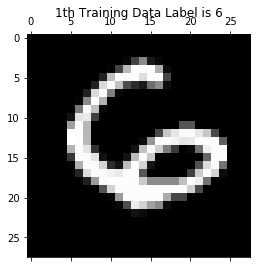

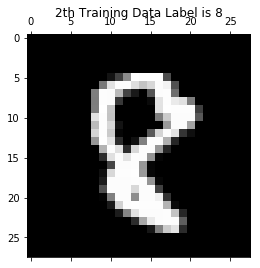

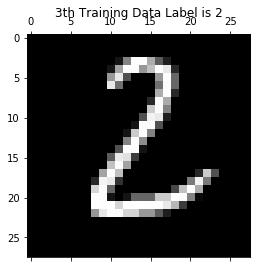

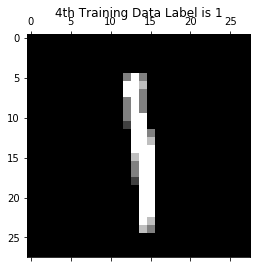

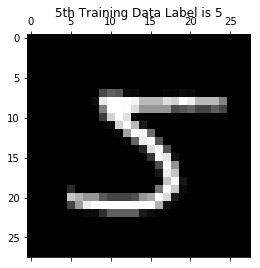

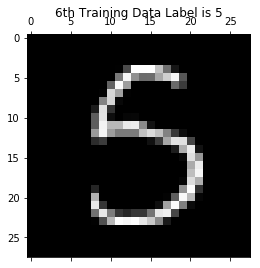

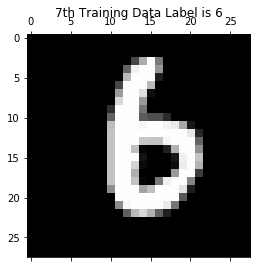

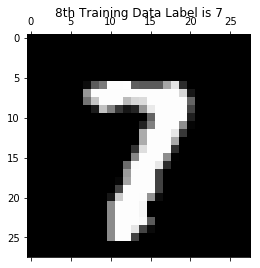

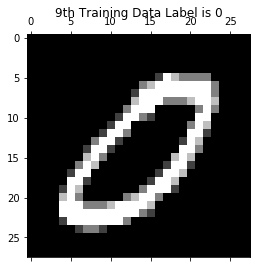

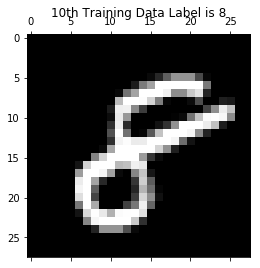

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

trainimg = mnist.train.images
trainlabel = mnist.train.labels

for i in range(10):
    curr_img   = np.reshape(trainimg[i, :], (28, 28))
    curr_label = np.argmax(trainlabel[i, :] )
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i + 1) + "th Training Data " + "Label is " + str(curr_label))

這些資料集的數據會以矩陣形式存在，可以來看看他們的 shape：

In [14]:
x_batch, y_batch = mnist.train.next_batch(100)

print(x_batch.shape)
print(y_batch.shape)

(100, 784)
(100, 10)


由於一次只拿出 100 筆資料，所以 shape 的第一個維度的大小為 100，而每張圖片的像素會以一連串的數列的形式保存，所以 x_batch 的第二個維度為 784 (28 x 28 = 784)，而 y_batch 的第二個維度則代表標籤的總類，也就是 10 個類別 (數字 0 ~ 9)，而它們已經做好 one-hot 編碼了

### 5.2 訓練神經網路

接著會附上訓練神經網路的程式碼：

In [15]:
x = tf.placeholder(tf.float32, shape = (None, 784))
y = tf.placeholder(tf.float32, shape = (None, 10))

# 神經網路第一層
layer_1_weight = tf.Variable(tf.random_uniform(shape = (784, 100)))
layer_1_bias = tf.Variable(tf.random_uniform(shape = (100, )))

layer_1_output = tf.nn.sigmoid(tf.matmul(x, layer_1_weight) + layer_1_bias)

# 神經網路第二層
layer_2_weight = tf.Variable(tf.random_uniform(shape = (100, 10)))
layer_2_bias = tf.Variable(tf.random_uniform(shape = (10, )))

layer_2_output = tf.matmul(layer_1_output, layer_2_weight) + layer_2_bias

# 定義 loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = layer_2_output))

# 定義 accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(layer_2_output, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 定義 optimizer 以及 learning rate
train_step = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 訓練 2000 次
for i in range(1, 2001):
    
    # 每次訓練隨機選 100 筆資料放進神經網路
    x_batch, y_batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x: x_batch, y: y_batch})
    
    # 每訓練 100 次查看一次目前的 loss
    if i % 100 == 0:
        print('Step %d training loss %.6f' % (i, sess.run(loss, feed_dict = {x: mnist.train.images, y: mnist.train.labels})))
        
# 查看訓練完後的神經網路的準確率
print('=================')
print('Test accuracy: %.6f' % sess.run(accuracy, feed_dict = {x: mnist.test.images, y: mnist.test.labels}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Step 100 training loss 2.307971
Step 200 training loss 2.309554
Step 300 training loss 2.307907
Step 400 training loss 2.303197
Step 500 training loss 2.305740
Step 600 training loss 2.310738
Step 700 training loss 2.308788
Step 800 training loss 2.296139
Step 900 training loss 2.233875
Step 1000 training loss 2.156107
Step 1100 training loss 2.048131
Step 1200 training loss 1.968740
Step 1300 training loss 1.852797
Step 1400 training loss 1.725179
Step 1500 training loss 1.612293
Step 1600 training loss 1.475601
Step 1700 training loss 1.328993
Step 1800 training loss 1.202159
Step 1900 training loss 1.094301
Step 2000 training loss 0.994730
Test accuracy: 0.812800


可以看到以上的神經網路最後的準確率大約在 0.7 到 0.8，然而神經網路在 MNIST 上的準確率是可以到達 0.95 以上的，所以接下來請隨意修改上面的程式碼，使其準確率可以超過 0.9

提示：

- 增加神經網路的層數
- 增加神經網路每層的神經元數量
- 換一個激活函數
- 調整 learning rate
- 訓練久一點